In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('iris.data', header=None)

In [3]:
data[4] = pd.Categorical(data[4]).codes
x, y = np.split(data.values, (4,), axis=1)

In [4]:
# 仅使用前两列特征
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
               ('poly', PolynomialFeatures(degree=2)),
               ('clf', LogisticRegression()) ])

In [5]:
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print ('y_hat = \n', y_hat)
print ('y_hat_prob = \n', y_hat_prob)
print (u'准确度：%.2f%%' % (100*np.mean(y_hat == y.ravel())))

y_hat = 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 2. 1.]
y_hat_prob = 
 [[0.95636649 0.02229721 0.0213363 ]
 [0.82119058 0.13155022 0.0472592 ]
 [0.96345857 0.01847458 0.01806685]
 [0.96147219 0.01980621 0.0187216 ]
 [0.98137946 0.00731619 0.01130436]
 [0.97913929 0.00770426 0.01315644]
 [0.989982   0.0027725  0.0072455 ]
 [0.95288163 0.02514667 0.0219717 ]
 [0.95817553 0.02185834 0.01996613]
 [0.8803775  0.08180714 0.03781535]
 [0.94708532 0.02559837 0.02731632]
 [0.97824564 0.00907563 0.01267873]
 [0.87377225 0.08867472 0.03755304]
 [0.98123971 0.00639871 0.01236158]
 [0.94332387 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [6]:
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

Text(0.5, 1.0, 'Logistic Regression')

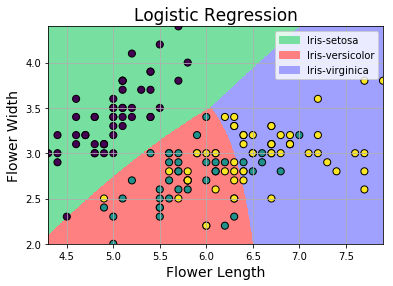

In [31]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], edgecolors='k', s=50)    # 样本的显示
plt.xlabel('Flower Length', fontsize=14)
plt.ylabel('Flower Width', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
          mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
          mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title(u'Logistic Regression', fontsize=17)

In [35]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)